In [10]:
from sklearn.decomposition import PCA
from likefunctions import saga_elasticnet_strong_random100
from likefunctions import random_result
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize,StandardScaler,normalize
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
datas=load_iris()
X_iris=datas.data
Y_iris=datas.target
# y_iris=label_binarize(Y_iris,classes=[0,1,2])
# result=random_result(X_iris,Y_iris)

In [11]:
from likefunctions import sag_nopunish_random100
sag_nopunistresult=sag_nopunish_random100(X_iris,Y_iris)


In [12]:
sag_nopunistresult.mean()

0.9575999999999999

In [13]:
from likefunctions import sag_elasticnet_random100
sag_elasticnet_result=sag_elasticnet_random100(X_iris,Y_iris)
# 计算不同弹性系数下的预测准确率

In [14]:
sag_elasticnet_result.mean(axis=0)


array([0.9526, 0.9528, 0.9532, 0.9532, 0.9534, 0.9538, 0.9544, 0.9546,
       0.9542, 0.9532, 0.952 ])

<function matplotlib.pyplot.show(*args, **kw)>

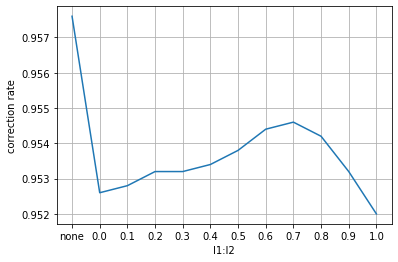

In [15]:
result_elastic_l1_ratio=np.append(sag_nopunistresult.mean(),sag_elasticnet_result.mean(axis=0))
xlabel=['none']+list([x/10 for x in range(11)])
plt.plot(xlabel,result_elastic_l1_ratio)
plt.xlabel('l1:l2')
plt.ylabel('correction rate')
plt.grid()
plt.show
# 绘制不同弹性系数下的结果图像

In [16]:
result_elastic_strong=saga_elasticnet_strong_random100(X_iris,Y_iris)
result_elastic_strong=np.append(sag_nopunistresult.mean(),result_elastic_strong.mean(axis=0))
# 计算在不同惩罚强度下的预测准确率

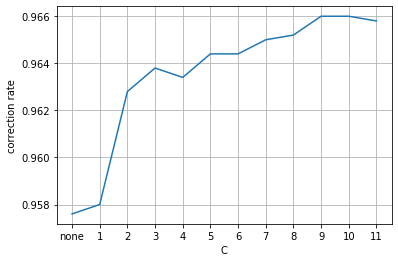

In [17]:
xlable_strong=['none']+list([x for x in range(1,12)])
plt.plot(xlable_strong,result_elastic_strong)
plt.xlabel('C')
plt.ylabel('correction rate')
plt.grid()
# 绘制了不同惩罚强度下的准确率曲线

In [18]:
from likefunctions import solver_elasticnet_strong_random100

# 计算不同求解器的求解结果

Text(0, 0.5, 'correction rate')

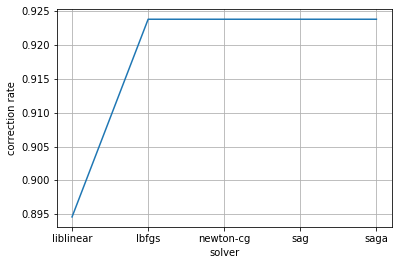

In [23]:
xlabel_solver=['liblinear','lbfgs','newton-cg','sag','saga']
result_solver100=result_solver.mean(axis=0)
plt.plot(xlabel_solver,result_solver100)
plt.grid()
plt.xlabel('solver')
plt.ylabel('correction rate')

In [30]:
import pstats
name='time_analysis'
stats=pstats.Stats(name)
stats.strip_dirs()
sorted_stats=stats.sort_stats('tottime')
sorted_stats.print_stats('solver_elasticnet_strong_random100')
# 处理了运算耗时分布

Sat Nov 30 11:01:49 2019    time_analysis

         3135439 function calls (3115406 primitive calls) in 4.252 seconds

   Ordered by: internal time
   List reduced from 5426 to 1 due to restriction <'solver_elasticnet_strong_random100'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    2.883    2.883 likefunctions.py:76(solver_elasticnet_strong_random100)




In [75]:
from likefunctions import spl_and_Std
x_train,x_test,y_train,y_test=spl_and_Std(X_iris,Y_iris)
clf=LogisticRegression(solver='saga',penalty='none',max_iter=100000,tol=1e-5,multi_class='multinomial')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
# 训练了一个名义上最好的分类器

0.96

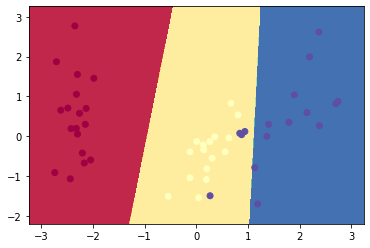

In [91]:
from sklearn.decomposition import PCA
from likefunctions import plot_func_region
dcp=PCA(n_components=2)
dcp.fit(x_train)
x_test2=dcp.transform(x_test)
x1_min, x1_max = x_test2[:, 0].min() - .5, x_test2[:, 0].max() + .5
x2_min, x2_max = x_test2[:, 1].min() - .5, x_test2[:, 1].max() + .5
h = .01
xx, xy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf.predict(dcp.inverse_transform(np.c_[xx.ravel(), xy.ravel()]))
z = Z.reshape(xx.shape)
plt.contourf(xx, xy, z, cmap=plt.cm.Spectral)
plt.scatter(x_test2[:,0],x_test2[:,1], c=y_test, cmap=plt.cm.Spectral)
